In [69]:
import pandas as pd
import numpy as np
 
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import seaborn as sns
from seaborn.linearmodels import *

from sklearn.metrics import mean_squared_error as mse
 
path = './data/'
train_file = path + 'train.csv'
test_file = path + 'test.csv'

output_file = 'eda'
final_file = '0104_'+output_file+'.csv'

In [70]:
df_train = pd.read_csv(train_file)
df_train = df_train.drop("Id",axis=1)
df_train.head()
target = df_train["SalePrice"].values
y_train = np.ravel(target)

In [5]:
print df_train.columns

Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
       u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2',
       u'BldgType', u'HouseStyle', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'RoofStyle', u'RoofMatl',
       u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'MasVnrArea',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual',
       u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'FireplaceQu',
       u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars'

In [6]:
df_train_num = df_train._get_numeric_data()
df_train_num.columns

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt',
       u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold', u'YrSold', u'SalePrice'],
      dtype='object')

In [5]:
df_train_num.describe()

/Users/wannjiun/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000          NaN    7553.500000     5.000000     5.000000   
50%      50.000000          NaN    9478.500000     6.000000     5.000000   
75%      70.000000          NaN   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000          NaN     0.000000     0.000000   
50%    1973.000000   1994.000000          NaN   383.500000     0.000000   
75%    2000.000000   2004.000000          NaN   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 37 columns]

In [6]:
np.sum(df_train_num.isnull()) 

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [7]:
## fill na using mean value
df_train_num = df_train_num.interpolate(method='linear')
# df_train_num['LotFrontage'] = df_train_num['LotFrontage'].fillna(df_train_num['LotFrontage'].mean())
# df_train_num['MasVnrArea'] = df_train_num['MasVnrArea'].fillna(df_train_num['MasVnrArea'].mean())
# df_train_num['GarageYrBlt'] = df_train_num['GarageYrBlt'].fillna(df_train_num['GarageYrBlt'].mean())

np.sum(df_train_num.isnull()) 

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [8]:
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
# df_train_num.plot(ax=axes[0], kind='scatter', x='MoSold', y='SalePrice')
# df_train_num.plot(ax=axes[1], kind='scatter', x='YrSold', y='SalePrice')
# df_train_num.plot(ax=axes[2], kind='scatter', x='LotArea', y='SalePrice')

In [9]:
target = df_train["SalePrice"].values 
y_train_series = pd.Series(y_train, name='SalePrice')

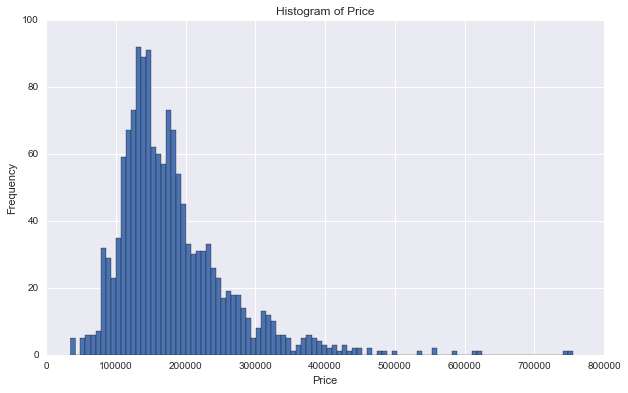

In [10]:
fig = plt.figure(figsize=(10,6))
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Histogram of Price')
y_train_series.hist(bins=100)

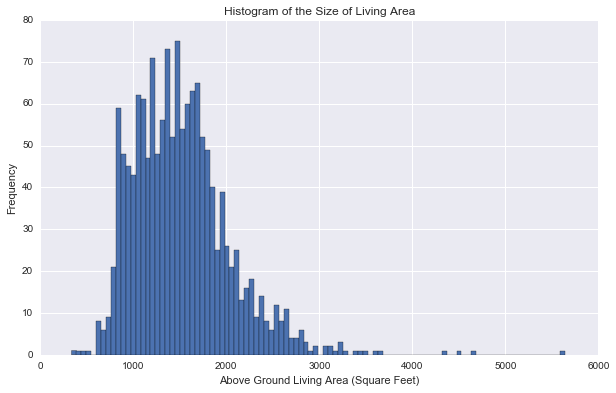

In [9]:
target = df_train["GrLivArea"].values 
y_train_series = pd.Series(target, name="GrLivArea")

fig = plt.figure(figsize=(10,6))
plt.ylabel('Frequency')
plt.xlabel('Above Ground Living Area (Square Feet)')
plt.title('Histogram of the Size of Living Area')
y_train_series.hist(bins=100)

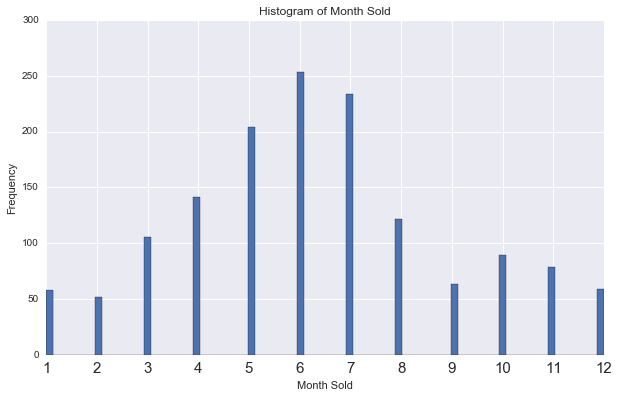

In [57]:
target = df_train["MoSold"].values 
y_train_series = pd.Series(target, name="MoSold")

 

fig = plt.figure(figsize=(10,6))
plt.ylabel('Frequency')
plt.xlabel('Month Sold')
plt.xticks(np.arange(15), range(15), fontsize = 15)
plt.title('Histogram of Month Sold')
y_train_series.hist(bins=80)

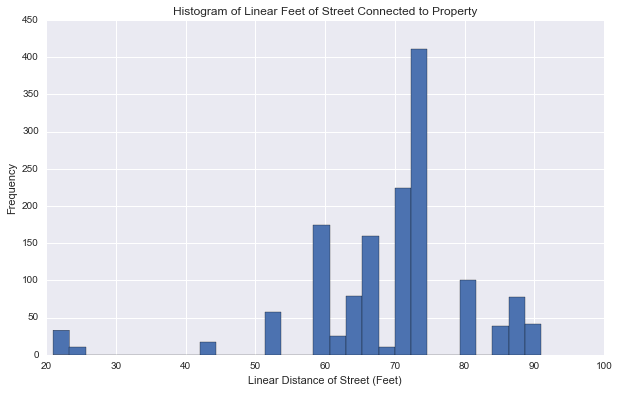

In [80]:
grouped = df_train["LotFrontage"].groupby(df_train["Neighborhood"])

for key, group in grouped:
    idx = df_train["Neighborhood"] == key
    df_train.loc[idx, "LotFrontage"] = group.median() 

fig = plt.figure(figsize=(10,6))
plt.ylabel('Frequency')
plt.xlabel('Linear Distance of Street (Feet)')
plt.title('Histogram of Linear Feet of Street Connected to Property')
df_train["LotFrontage"].hist(bins=30)    
# grouped = df_train["LotFrontage"].groupby(df_train["Neighborhood"])    

# for i, group in grouped:
#     plt.figure()
#     group.plot(kind = 'hist', title=str(i)) 

In [20]:
target = df_train["CentralAir"].values 
y_train_series = pd.Series(target, name="GrLivArea")
# df_train["CentralAir"] = (df_train["CentralAir"] == "Y") * 1.0
print sum(df_train["CentralAir"].values)/len(y_train_series) 

target = df_train["LotShape"].values 
y_train_series = pd.Series(target, name="LotShape")
df_train["LotShape"] = (df_train["LotShape"] == "Reg") * 1.0
print sum(df_train["LotShape"].values)/len(y_train_series) 

0.934931506849
0.633561643836


In [19]:
target = df_train["ExterQual"].values 
y_train_series = pd.Series(target, name="ExterQual")
y_train_series

0       Gd
1       TA
2       Gd
3       TA
4       Gd
5       TA
6       Gd
7       TA
8       TA
9       TA
10      TA
11      Ex
12      TA
13      Gd
14      TA
15      TA
16      TA
17      TA
18      TA
19      TA
20      Gd
21      TA
22      Gd
23      TA
24      TA
25      Gd
26      TA
27      Gd
28      TA
29      TA
        ..
1430    Gd
1431    TA
1432    TA
1433    TA
1434    TA
1435    Gd
1436    TA
1437    Ex
1438    TA
1439    TA
1440    TA
1441    Gd
1442    Ex
1443    TA
1444    Gd
1445    TA
1446    TA
1447    Gd
1448    TA
1449    TA
1450    TA
1451    Gd
1452    TA
1453    TA
1454    Gd
1455    TA
1456    TA
1457    Ex
1458    TA
1459    Gd
Name: ExterQual, dtype: object

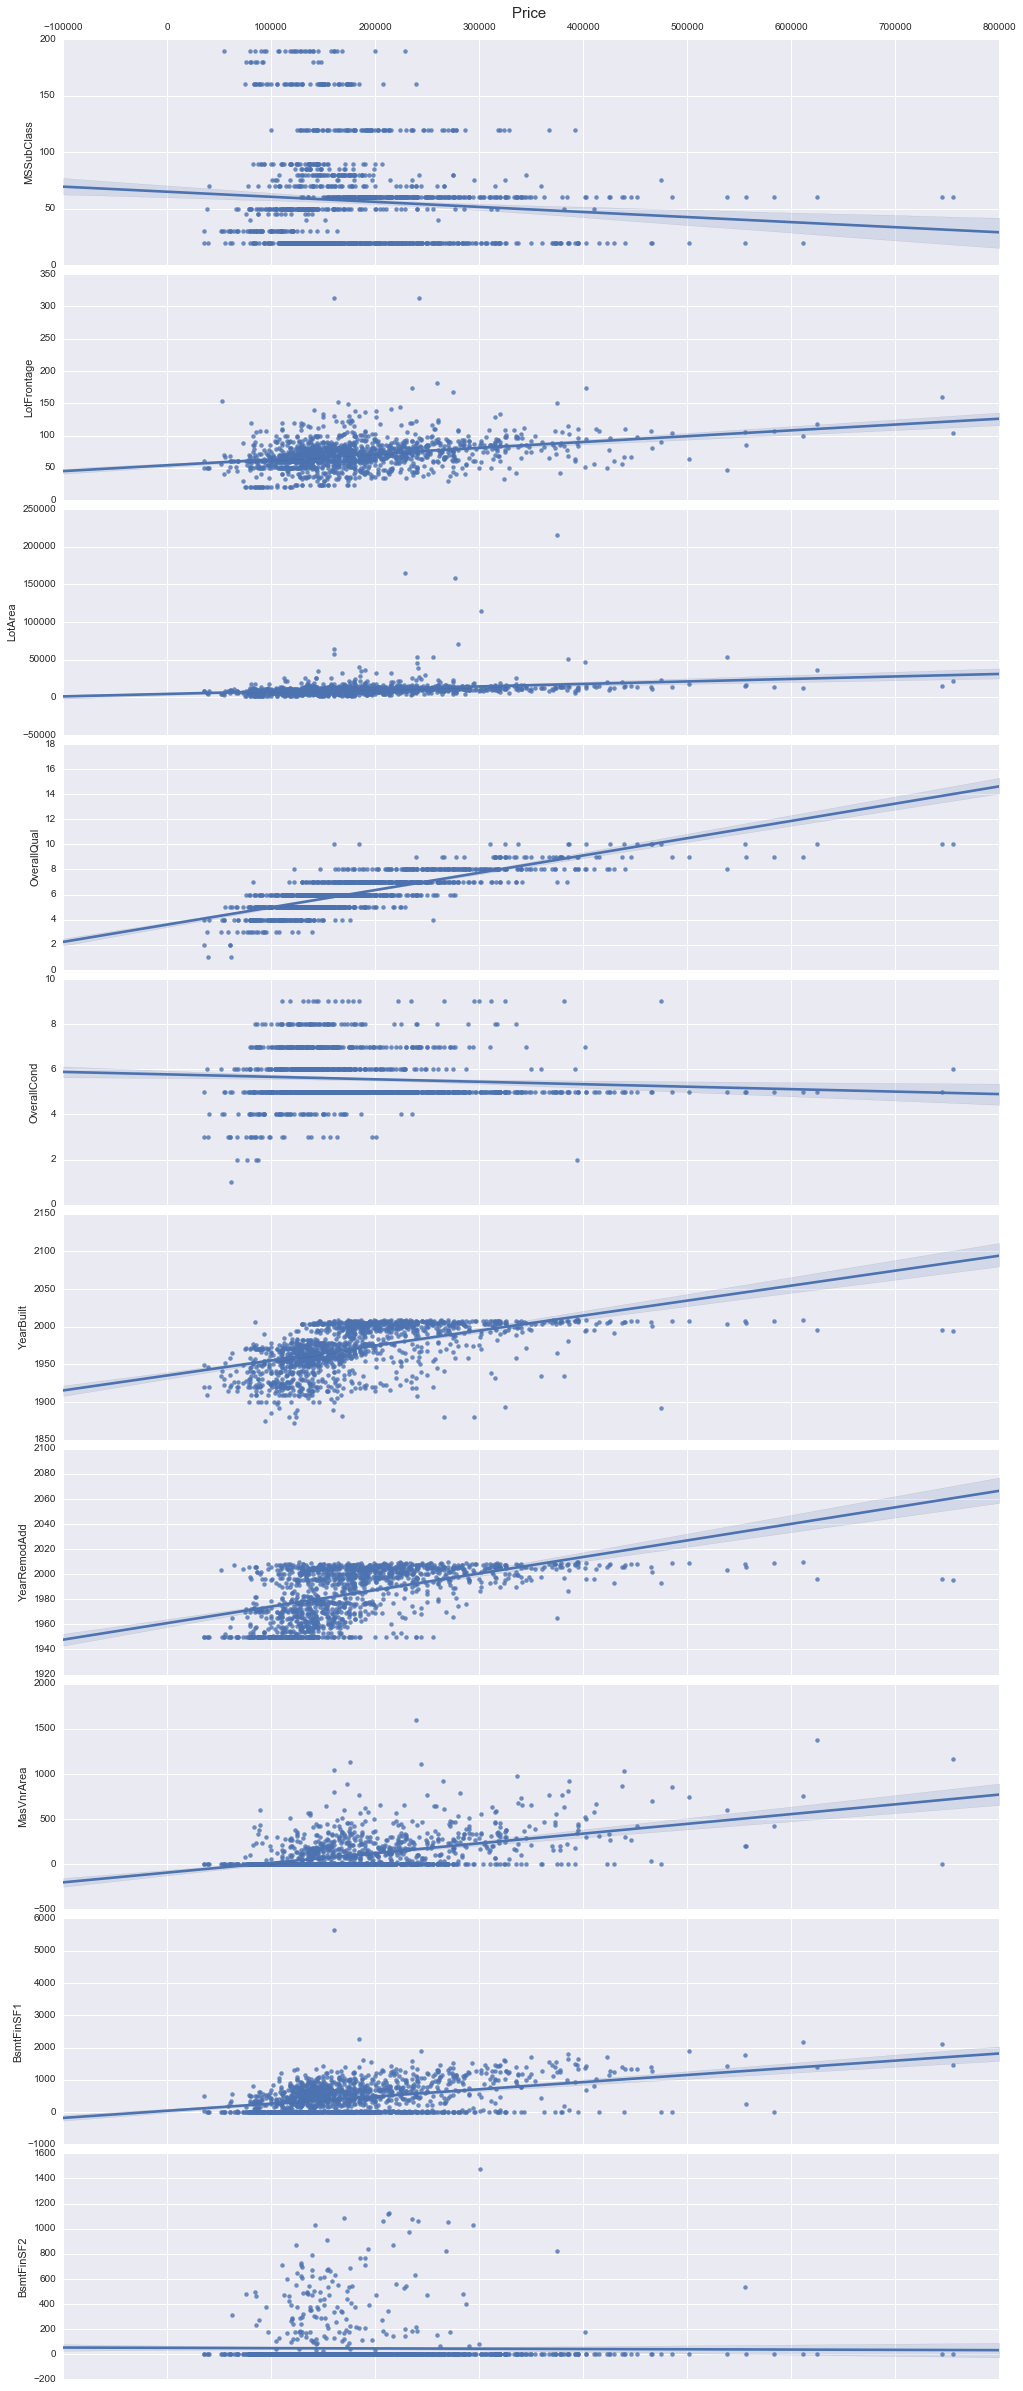

In [11]:
X_1 = df_train_num 

fig = plt.figure(figsize=(14,33))
gs = gridspec.GridSpec(10, 1)

for i in range(0,10):
    ax1 = plt.subplot(gs[i,0])
    sns.regplot(y_train_series, X_1.iloc[:,i],ax=ax1)
    ax1.set_title('')
    ax1.set_xlabel('')
    ylim = ax1.get_ylim()   
       
    if i != 0:
        ax1.set_xticklabels([''])
        
    else:
        ax1.set_title('Price \n',size=15)
        
        for tick in ax1.xaxis.get_major_ticks():
            tick.label1On = False
            tick.label2On = True

plt.tight_layout(pad=0, w_pad=0, h_pad=0)

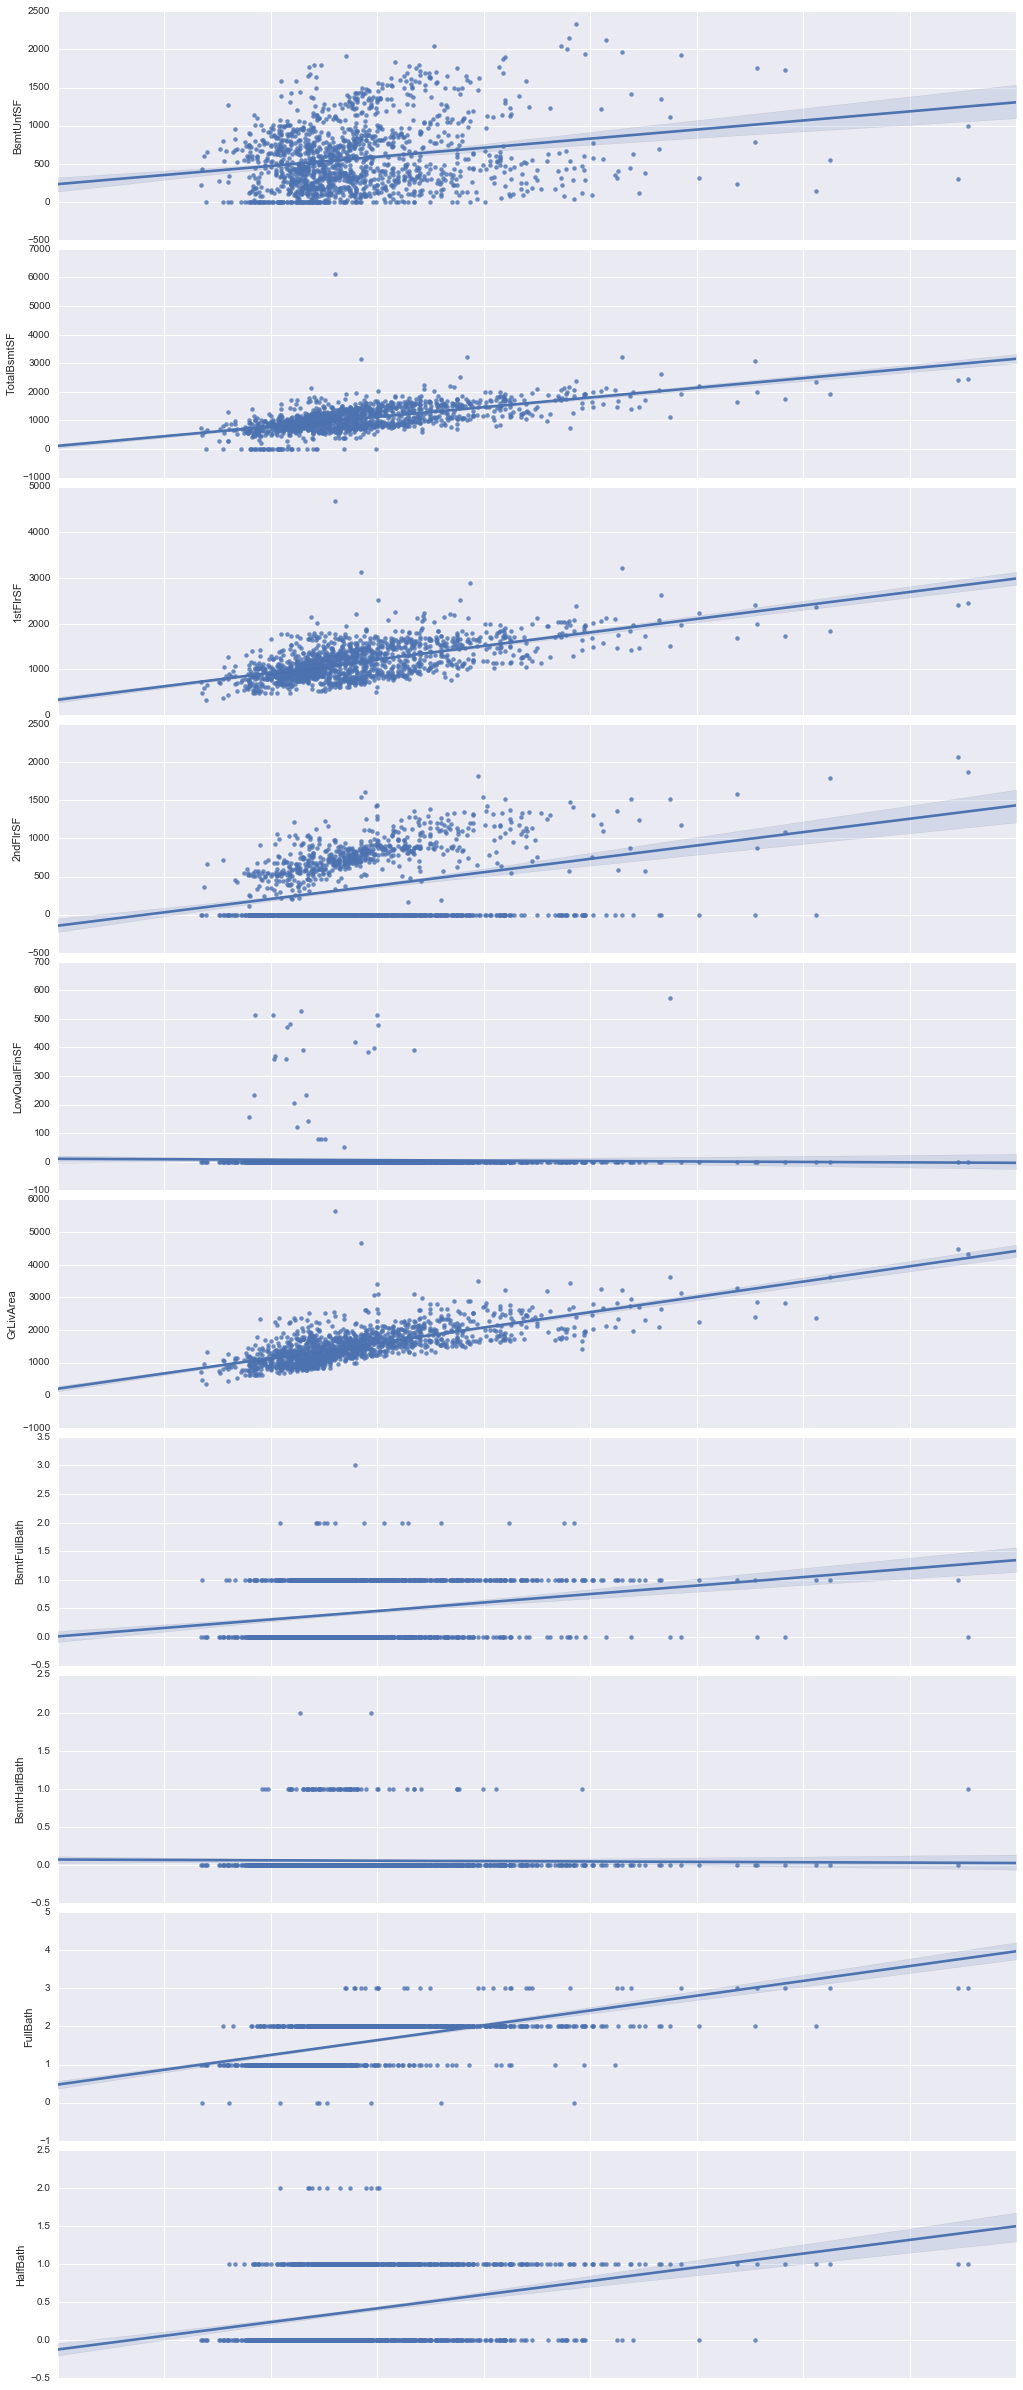

In [12]:
X_1 = df_train_num 

fig = plt.figure(figsize=(14,33))
gs = gridspec.GridSpec(10, 1)

for i in range(10,20):
    ax1 = plt.subplot(gs[i-10,0])
    sns.regplot(y_train_series, X_1.iloc[:,i],ax=ax1)
    ax1.set_title('')
    ax1.set_xlabel('')
    ylim = ax1.get_ylim()   
       
    if i != 0:
        ax1.set_xticklabels([''])
        
    else:
        ax1.set_title('Price \n',size=15)
        
        for tick in ax1.xaxis.get_major_ticks():
            tick.label1On = False
            tick.label2On = True

plt.tight_layout(pad=0, w_pad=0, h_pad=0)

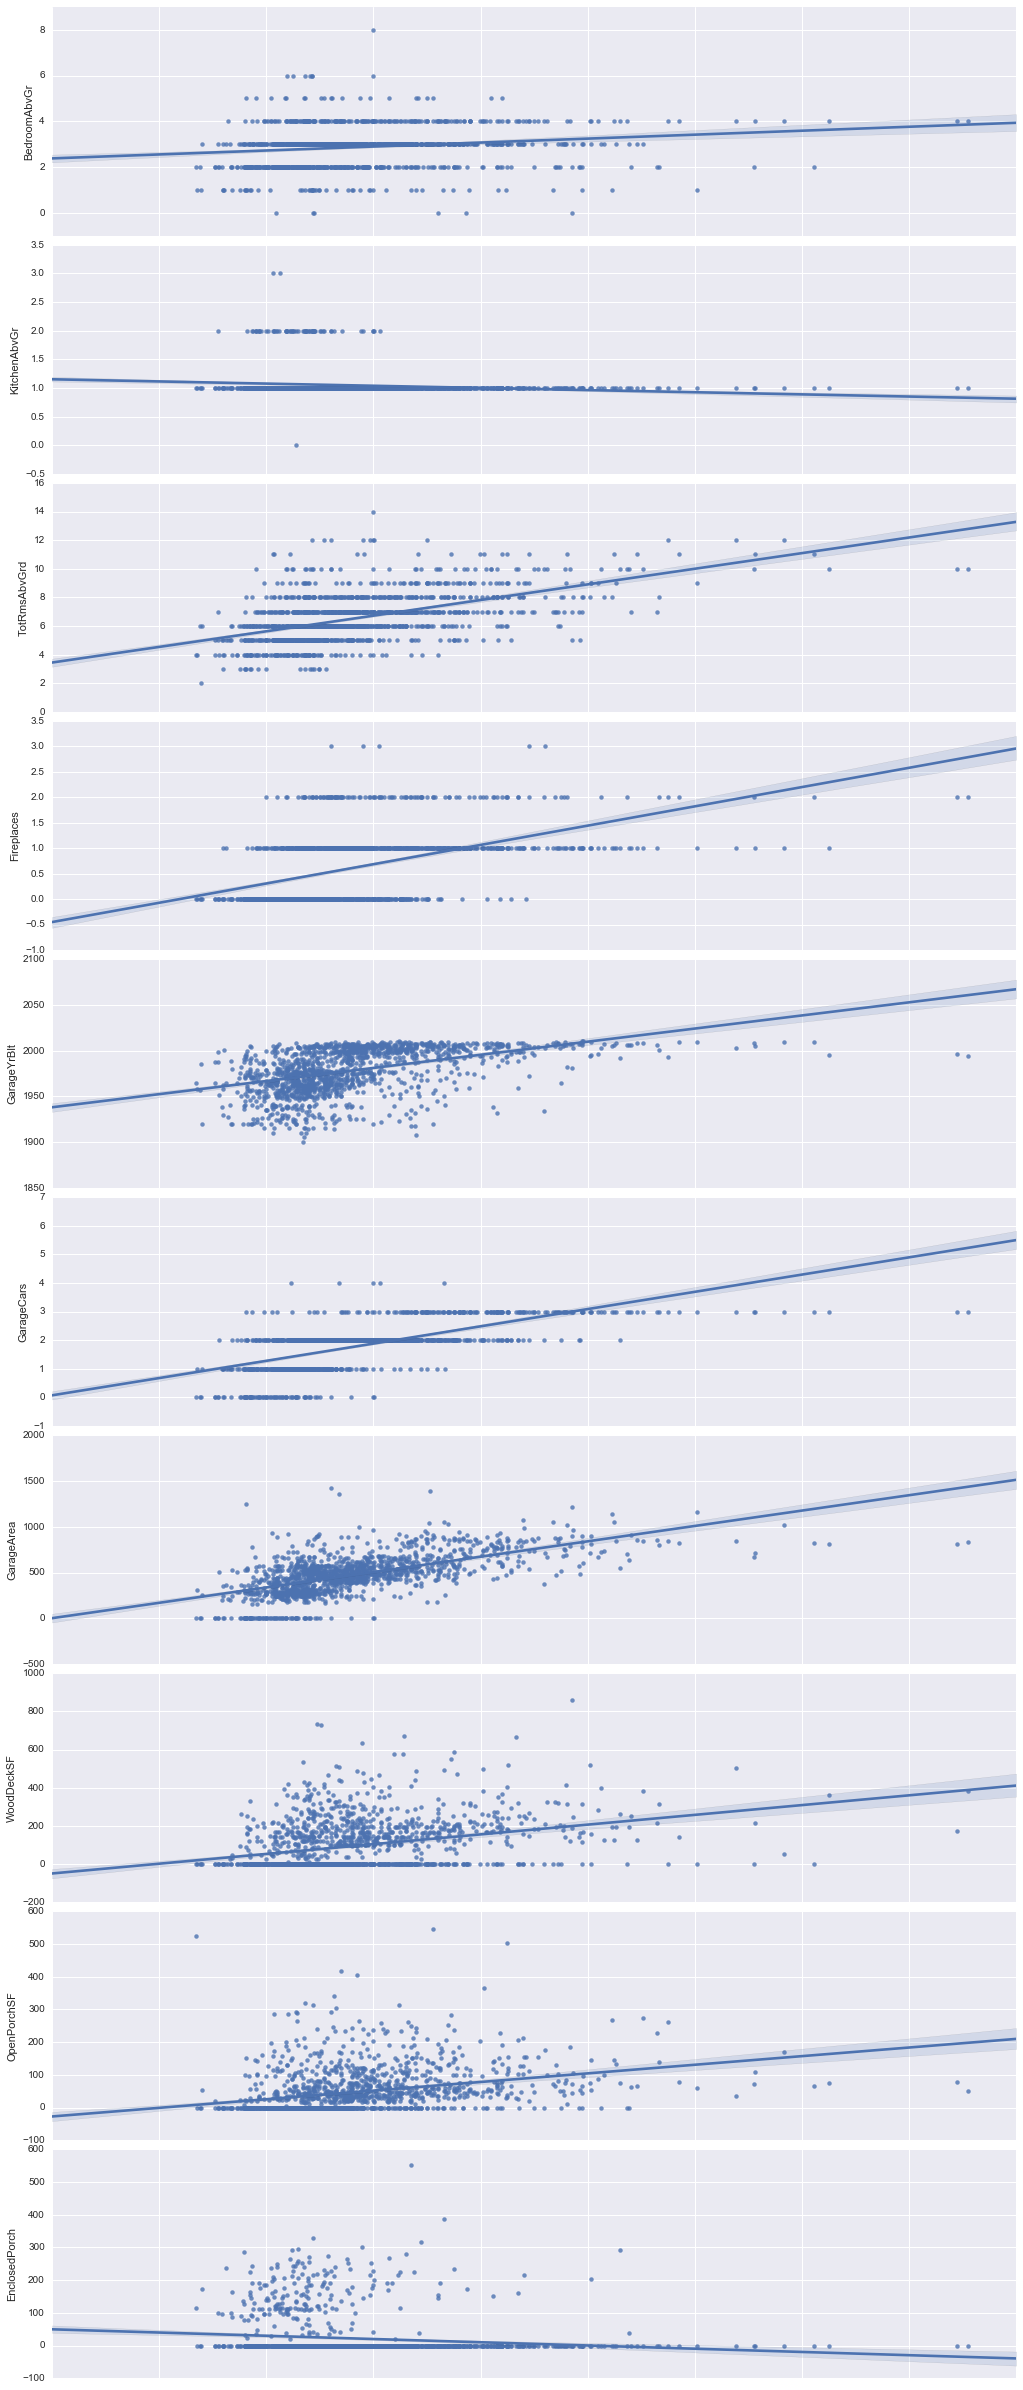

In [13]:
X_1 = df_train_num 

fig = plt.figure(figsize=(14,33))
gs = gridspec.GridSpec(10, 1)

for i in range(20,30):
    ax1 = plt.subplot(gs[i-20,0])
    sns.regplot(y_train_series, X_1.iloc[:,i],ax=ax1)
    ax1.set_title('')
    ax1.set_xlabel('')
    ylim = ax1.get_ylim()   
       
    if i != 0:
        ax1.set_xticklabels([''])
        
    else:
        ax1.set_title('Price \n',size=15)
        
        for tick in ax1.xaxis.get_major_ticks():
            tick.label1On = False
            tick.label2On = True

plt.tight_layout(pad=0, w_pad=0, h_pad=0)

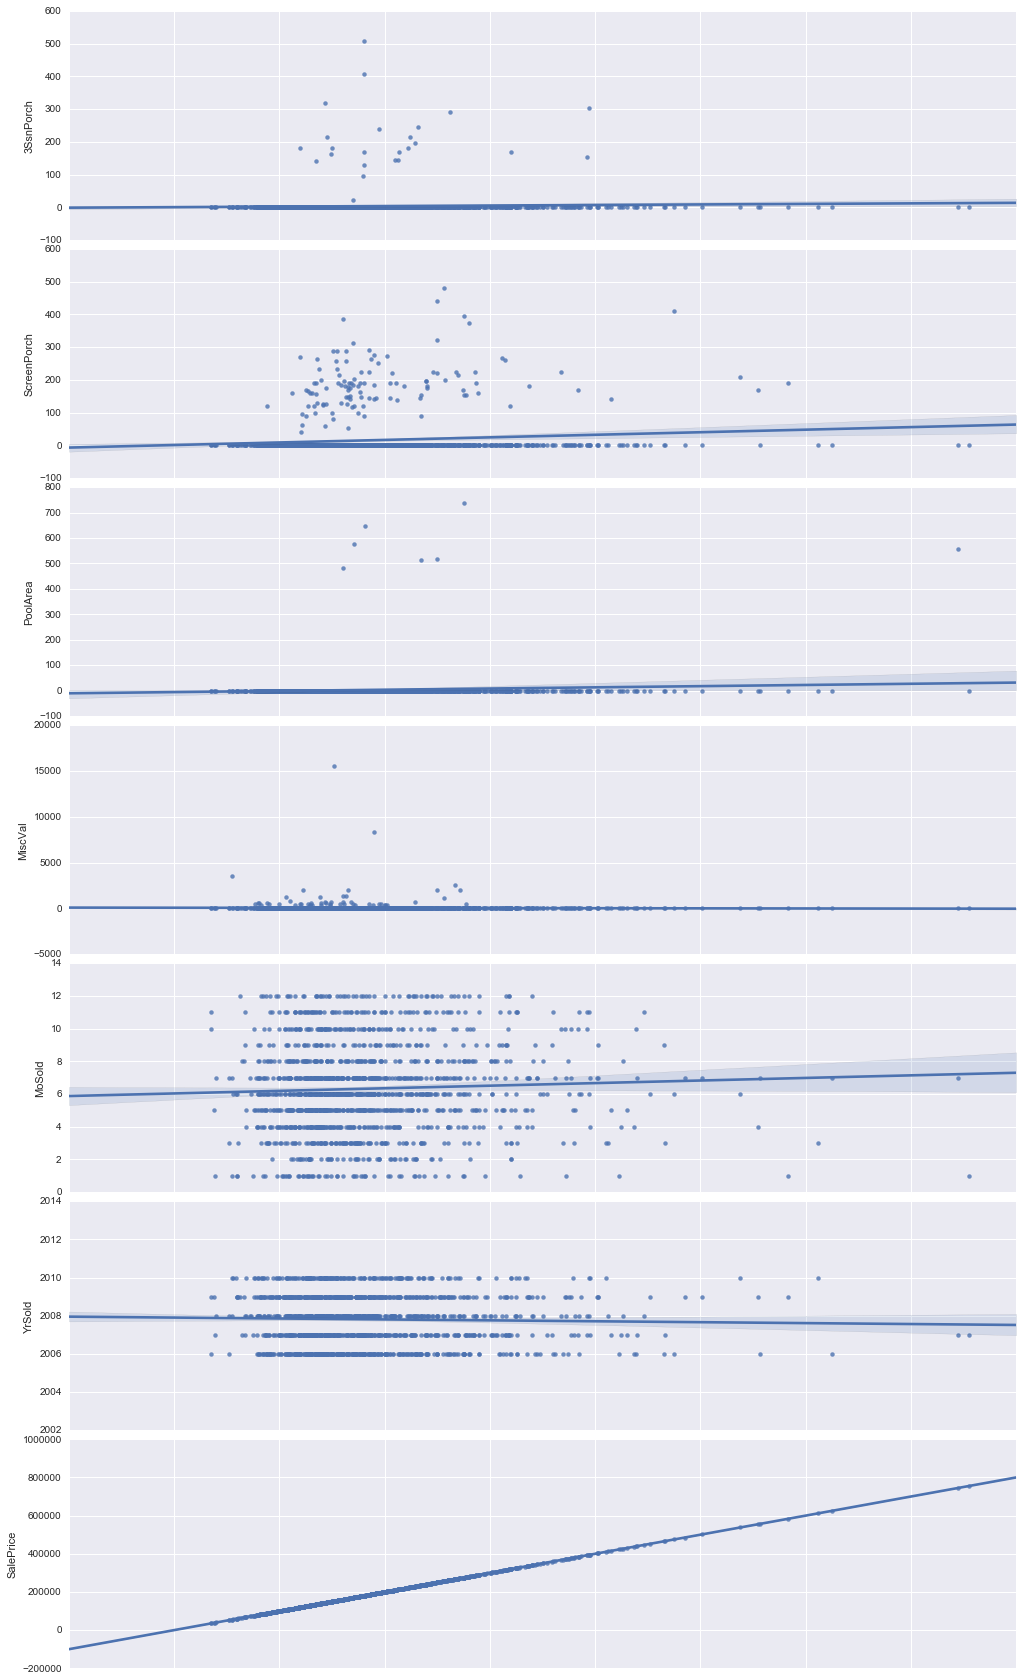

In [14]:
X_1 = df_train_num 

fig = plt.figure(figsize=(14,33))
gs = gridspec.GridSpec(10, 1)

for i in range(30,37):
    ax1 = plt.subplot(gs[i-30,0])
    sns.regplot(y_train_series, X_1.iloc[:,i],ax=ax1)
    ax1.set_title('')
    ax1.set_xlabel('')
    ylim = ax1.get_ylim()   
       
    if i != 0:
        ax1.set_xticklabels([''])
        
    else:
        ax1.set_title('Price \n',size=15)
        
        for tick in ax1.xaxis.get_major_ticks():
            tick.label1On = False
            tick.label2On = True

plt.tight_layout(pad=0, w_pad=0, h_pad=0)

In [15]:
# selected = ["TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", "GarageArea", 
# "TotalBsmtSF", "1stFlrSF", "GrLivArea", "OverallQual","OverallQual", "YearBuilt", "LotFrontage"]
selected = ["TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageArea", 
"TotalBsmtSF", "GrLivArea","OverallQual", "YearBuilt", "LotFrontage"]
df_train_num_selected = df_train_num[selected]
df_train_num_selected.head()

TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageArea  TotalBsmtSF  GrLivArea  \
0             8           0       2003.0         548          856       1710   
1             6           1       1976.0         460         1262       1262   
2             6           1       2001.0         608          920       1786   
3             7           1       1998.0         642          756       1717   
4             9           1       2000.0         836         1145       2198   

   OverallQual  YearBuilt  LotFrontage  
0            7       2003         65.0  
1            6       1976         80.0  
2            7       2001         68.0  
3            7       1915         60.0  
4            8       2000         84.0

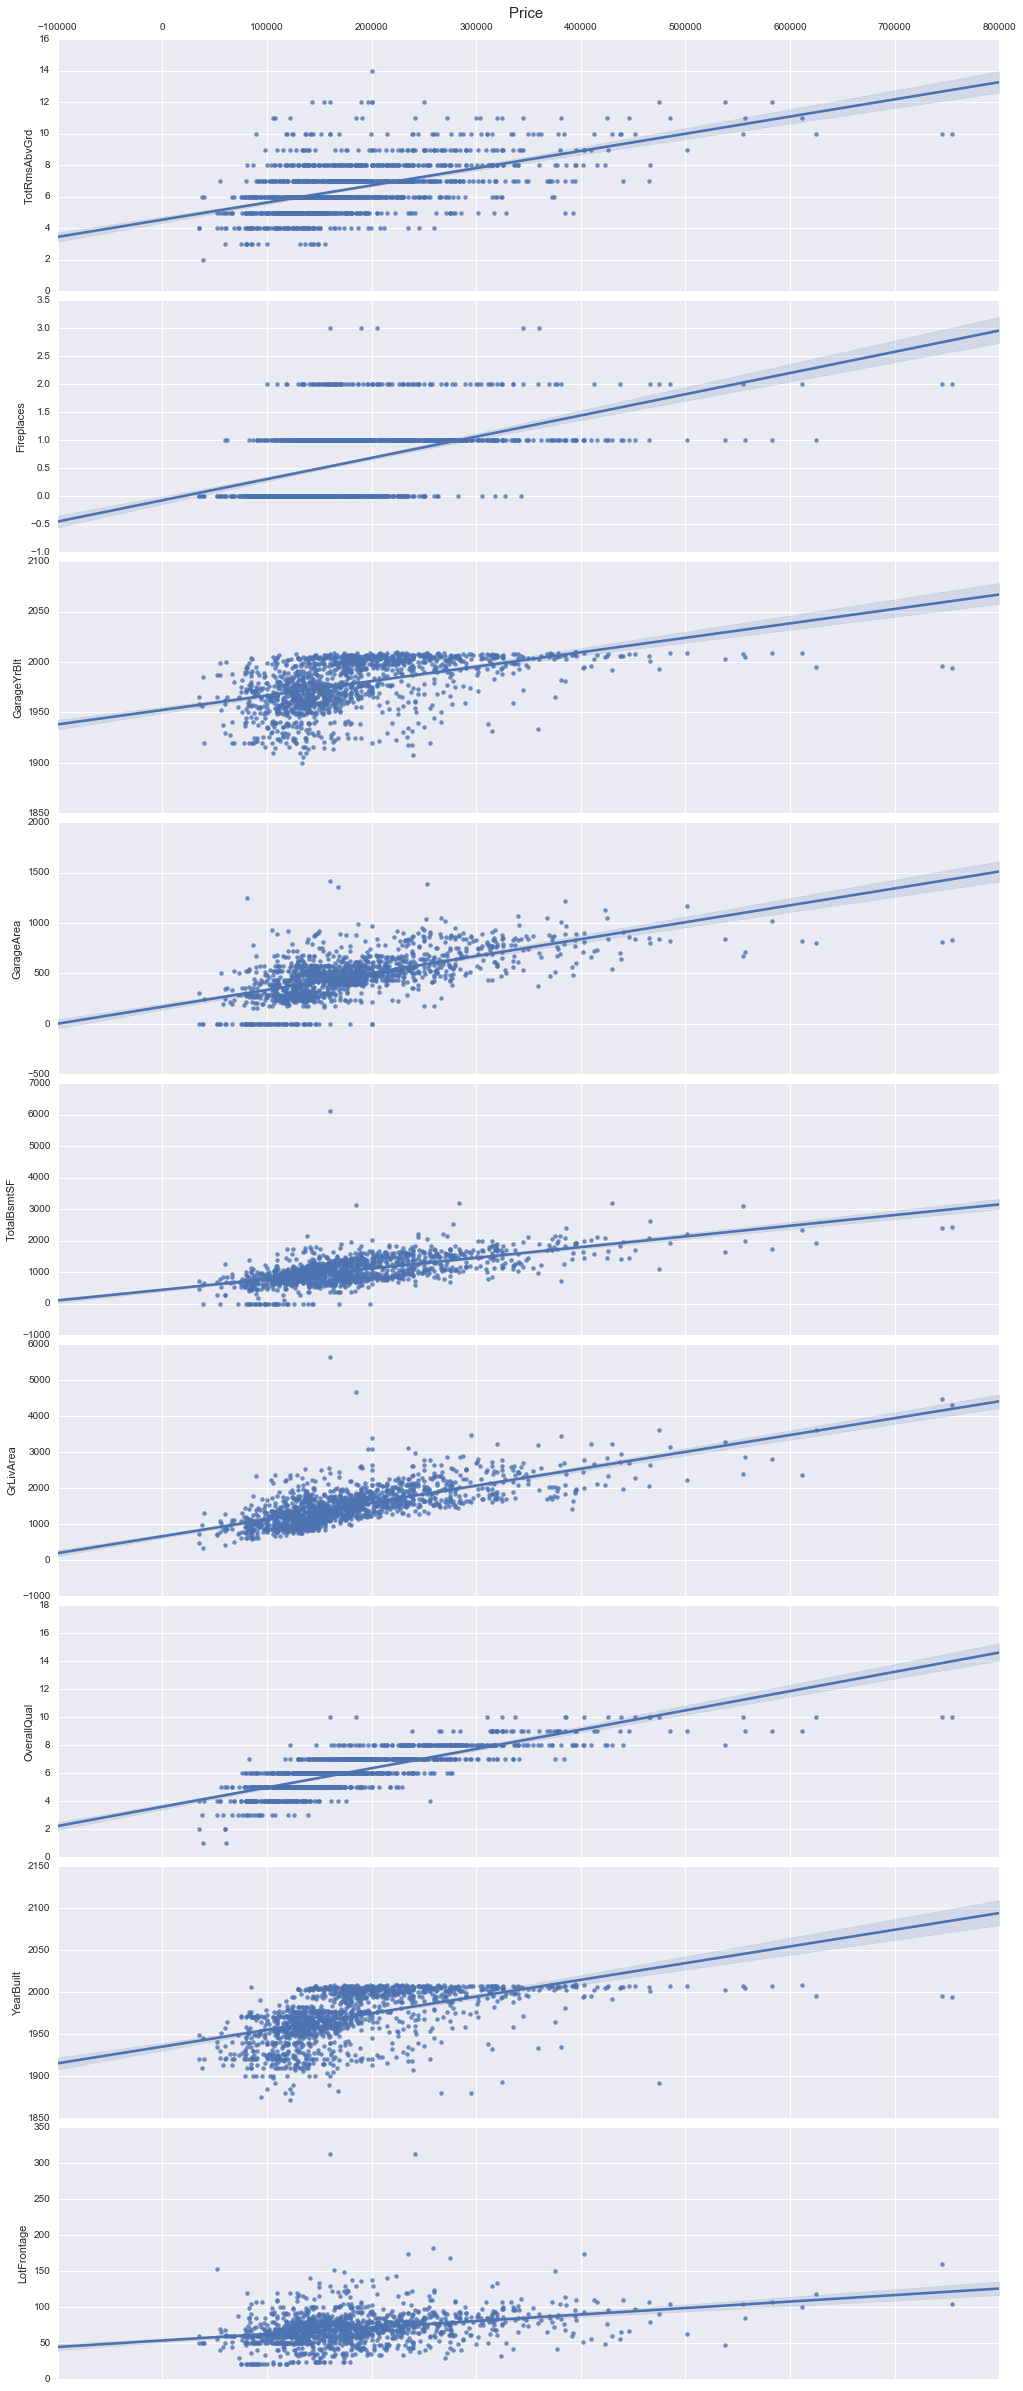

In [16]:
X_1 = df_train_num_selected 

fig = plt.figure(figsize=(14,33))
gs = gridspec.GridSpec(9, 1)

for i in range(0,9):
    ax1 = plt.subplot(gs[i,0])
    sns.regplot(y_train_series, X_1.iloc[:,i],ax=ax1)
    ax1.set_title('')
    ax1.set_xlabel('')
    ylim = ax1.get_ylim()   
       
    if i != 0:
        ax1.set_xticklabels([''])
        
    else:
        ax1.set_title('Price \n',size=15)
        
        for tick in ax1.xaxis.get_major_ticks():
            tick.label1On = False
            tick.label2On = True

plt.tight_layout(pad=0, w_pad=0, h_pad=0)

/Users/wannjiun/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/wannjiun/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


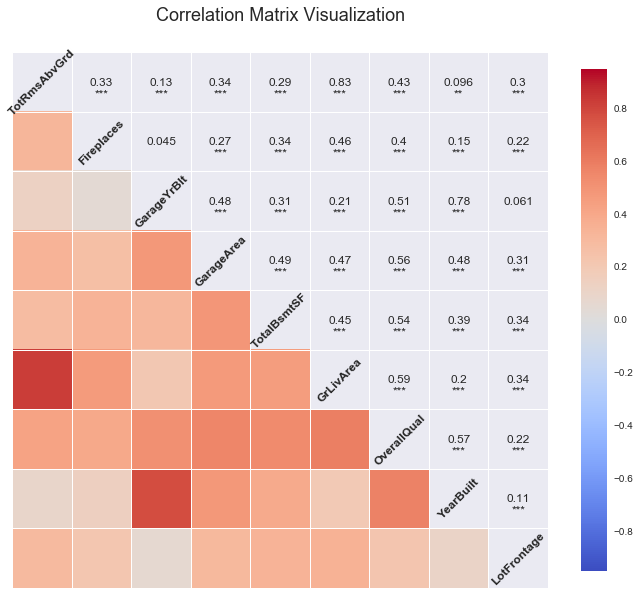

In [17]:
fig = plt.figure(figsize=(12,12))
sns.linearmodels.corrplot(df_train_num_selected)
plt.title("Correlation Matrix Visualization",fontsize=18)